In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models
canv = ROOT.TCanvas("canv","canv",800,400)
import numpy as np
from scipy.optimize import least_squares
np.random.seed(0)

Welcome to JupyROOT 6.20/06


In [2]:
rf = ROOT.TFile("new.root","READ")

In [3]:
rf.ls()

TFile**		new.root	
 TFile*		new.root	
  KEY: TTree	tree;1	tree


In [4]:
tree = rf.get("tree")

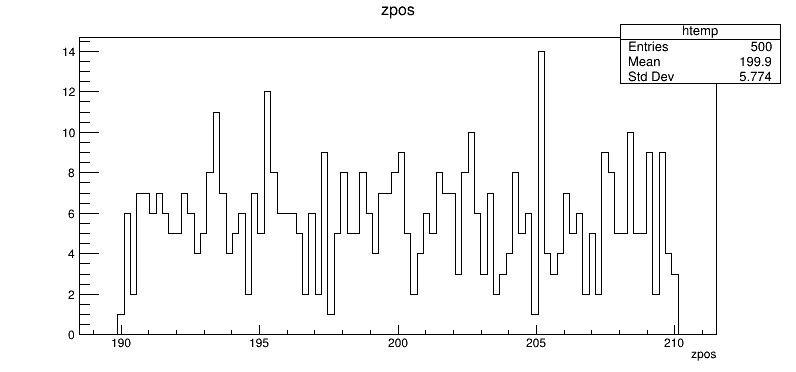

In [9]:
tree.Draw("zpos")
canv.Draw()

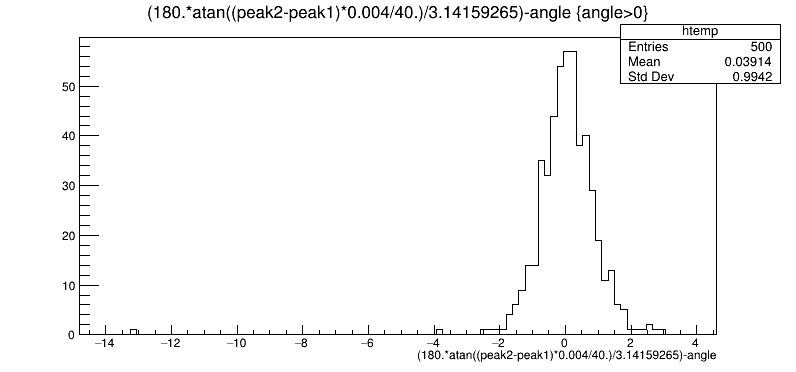

In [22]:
tree.Draw("(180.*atan((peak2-peak1)*0.004/40.)/3.14159265)-angle","angle>0")
canv.Draw()

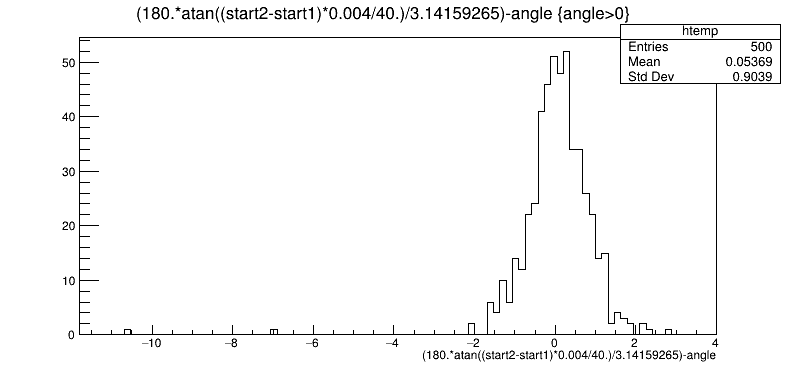

In [37]:
tree.Draw("(180.*atan((start2-start1)*0.004/40.)/3.14159265)-angle","angle>0")
canv.Draw()

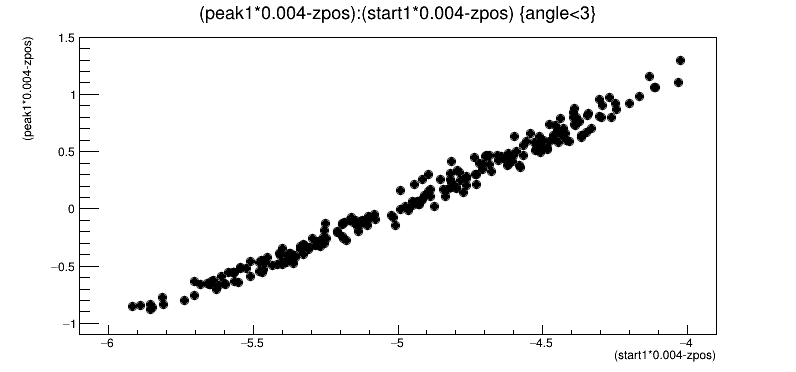

In [19]:
tree.Draw("(peak1*0.004-zpos):(start1*0.004-zpos)","angle<3")
canv.Draw()

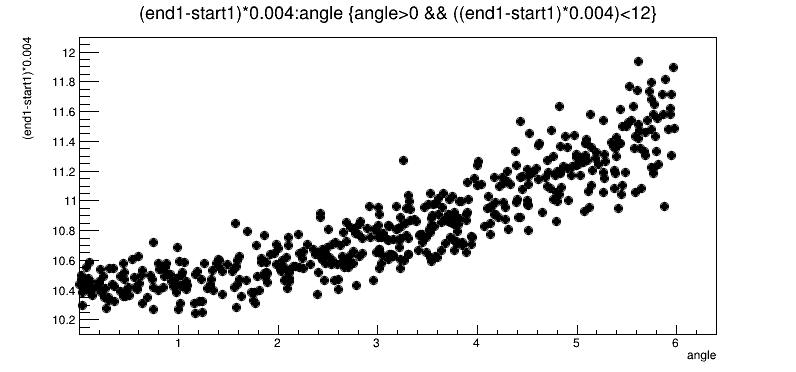

In [21]:
tree.Draw("(end1-start1)*0.004:angle","angle>0 && ((end1-start1)*0.004)<12")
canv.Draw()

In [24]:
instance = ROOT.TMVA.Tools.Instance()
out_file = ROOT.TFile.Open("tmva.root","RECREATE")
factory = ROOT.TMVA.Factory("TMVAnew",out_file,"!V:!Silent:Color:!DrawProgressBar:AnalysisType=Regression" )

In [25]:
dataloader = ROOT.TMVA.DataLoader("tree")
dataloader.AddVariable("start1", "Start pad1", "ns", 'F' )
dataloader.AddVariable("start2", "Start pad2", "ns", 'F' )
dataloader.AddVariable("peak1", "Peak pad1", "ns", 'F' )
dataloader.AddVariable("peak2", "Peak pad2", "ns", 'F' )
dataloader.AddVariable("end1", "End pad1", "ns", 'F' )
dataloader.AddVariable("end2", "End pad2", "ns", 'F' )
dataloader.AddTarget( "angle" )
input = ROOT.TFile.Open( "new.root" )
regTree = input["tree"]
dataloader.AddRegressionTree( regTree, 1.0 )
mycut = ROOT.TCut("")
dataloader.PrepareTrainingAndTestTree(mycut,"nTrain_Regression=400:nTest_Regression=0:SplitMode=Random:NormMode=NumEvents:!V" )
factory.BookMethod( dataloader, ROOT.TMVA.Types.kMLP , "MLP", "!H:!V:VarTransform=Norm:NeuronType=tanh:NCycles=20000:HiddenLayers=N+20:TestRate=6:TrainingMethod=BFGS:Sampling=0.3:SamplingEpoch=0.8:ConvergenceImprove=1e-6:ConvergenceTests=15:!UseRegulator")
factory.TrainAllMethods()
factory.TestAllMethods()
factory.EvaluateAllMethods()
out_file.Close()

create data set info tree
DataSetInfo              : [tree] : Added class "Regression"
                         : Add Tree tree of type Regression with 500 events
                         : Dataset[tree] : Class index : 0  name : Regression
Factory                  : Booking method: MLP
                         : 
MLP                      : [tree] : Create Transformation "Norm" with events from all classes.
                         : 
                         : Transformation, Variable selection : 
                         : Input : variable 'start1' <---> Output : variable 'start1'
                         : Input : variable 'start2' <---> Output : variable 'start2'
                         : Input : variable 'peak1' <---> Output : variable 'peak1'
                         : Input : variable 'peak2' <---> Output : variable 'peak2'
                         : Input : variable 'end1' <---> Output : variable 'end1'
                         : Input : variable 'end2' <---> Output : variable

In [26]:
rft = ROOT.TFile("tmva.root","READ")

In [33]:
rft.ls()

TFile**		tmva.root	
 TFile*		tmva.root	
  TDirectoryFile*		tree	tree
   KEY: TH2F	CorrelationMatrix;1	Correlation Matrix
   KEY: TDirectoryFile	InputVariables_Id;1	InputVariables_Id
   KEY: TDirectoryFile	Method_MLP;1	Directory for all MLP methods
   KEY: TTree	TestTree;1	TestTree
   KEY: TTree	TrainTree;1	TrainTree
  KEY: TDirectoryFile	tree;1	tree


In [36]:
tr = rft["tree/TestTree"]
tr.Print()

******************************************************************************
*Tree    :TestTree  : TestTree                                               *
*Entries :      100 : Total =           12127 bytes  File  Size =       5318 *
*        :          : Tree compression factor =   1.48                       *
******************************************************************************
*Br    0 :classID   : classID/I                                              *
*Entries :      100 : Total  Size=        971 bytes  File Size  =        101 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   4.73     *
*............................................................................*
*Br    1 :className : className/C                                            *
*Entries :      100 : Total  Size=       2089 bytes  File Size  =        325 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   4.89     *
*...................................................

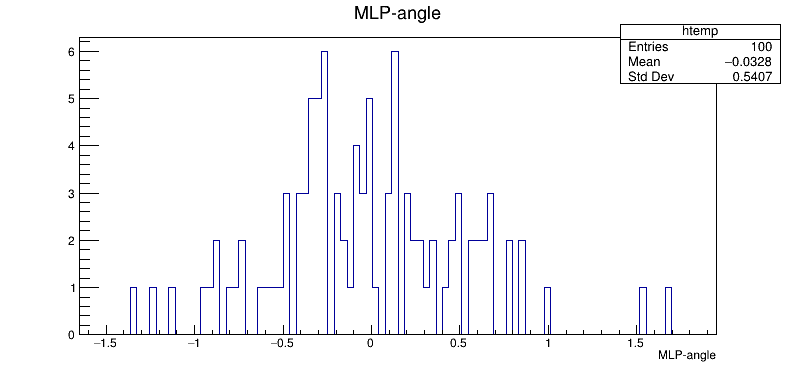

In [38]:
tr.Draw("MLP-angle")
canv.Draw()